In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import geopandas as gpd

In [3]:
# Ebola 데이터 읽기
ebola = pd.read_csv('data/ebola_2014-2016.csv')

In [4]:
# Ebola의 Date 컬럼을 datetime 타입으로 변경
ebola.Date = pd.to_datetime(ebola['Date'], format='%Y-%m-%d')

In [5]:
# 데이터를 2014, 2015, 2016으로 나누기
mask_2014 = (ebola['Date'] >= '2014-01-01') & (ebola['Date'] <= '2014-12-31')
mask_2015 = (ebola['Date'] >= '2015-01-01') & (ebola['Date'] <= '2015-12-31')
mask_2016 = (ebola['Date'] >= '2016-01-01') & (ebola['Date'] <= '2016-12-31')

In [6]:
ebola2014 = ebola.loc[mask_2014]
ebola2015 = ebola.loc[mask_2015]
ebola2016 = ebola.loc[mask_2016]

In [7]:
ebola2016 = ebola2016.drop(['Date'], axis=1)

In [8]:
ebola2014_df = pd.DataFrame(
    data = {
        'Cases': [ebola2014.loc[ebola2014['Country'] == x].sum()[1] for x in ebola2014['Country'].unique()],
        'Deaths': [ebola2014.loc[ebola2014['Country'] == x].sum()[2] for x in ebola2014['Country'].unique()]
    },
    index = ebola2014['Country'].unique(),
    columns = ['Cases', 'Deaths']
)

ebola2015_df = pd.DataFrame(
    data = {
        'Cases': [ebola2015.loc[ebola2015['Country'] == x].sum()[1] for x in ebola2015['Country'].unique()],
        'Deaths': [ebola2015.loc[ebola2015['Country'] == x].sum()[2] for x in ebola2015['Country'].unique()]
    },
    index = ebola2015['Country'].unique(),
    columns = ['Cases', 'Deaths']
)

ebola2016_df = pd.DataFrame(
    data = {
        'Cases': [ebola2016.loc[ebola2016['Country'] == x].sum()[1] for x in ebola2016['Country'].unique()],
        'Deaths': [ebola2016.loc[ebola2016['Country'] == x].sum()[2] for x in ebola2016['Country'].unique()]
    },
    index = ebola2016['Country'].unique(),
    columns = ['Cases', 'Deaths']
)

Text(0.5, 1.0, 'Ebola virus dist worldwide - 2014')

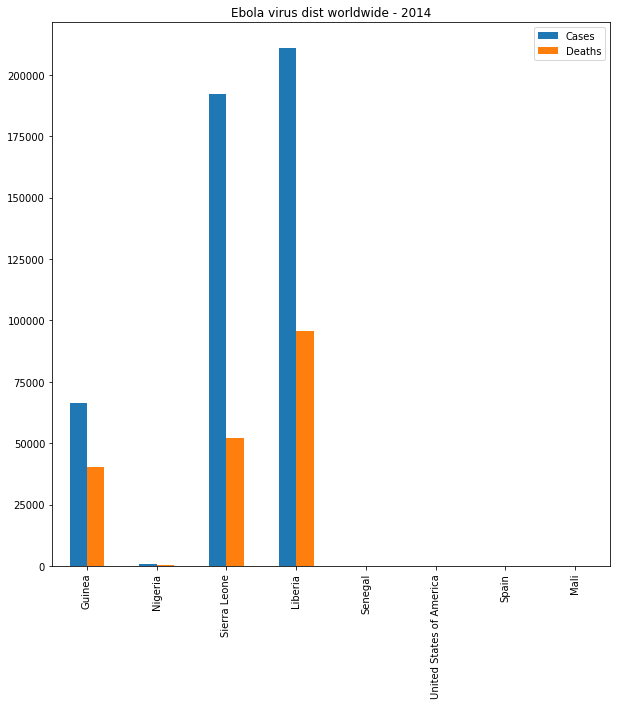

In [9]:
ebola2014_df.plot(kind='bar', figsize=(10, 10))
plt.title('Ebola virus dist worldwide - 2014')

Text(0.5, 1.0, 'Ebola virus dist worldwide - 2015')

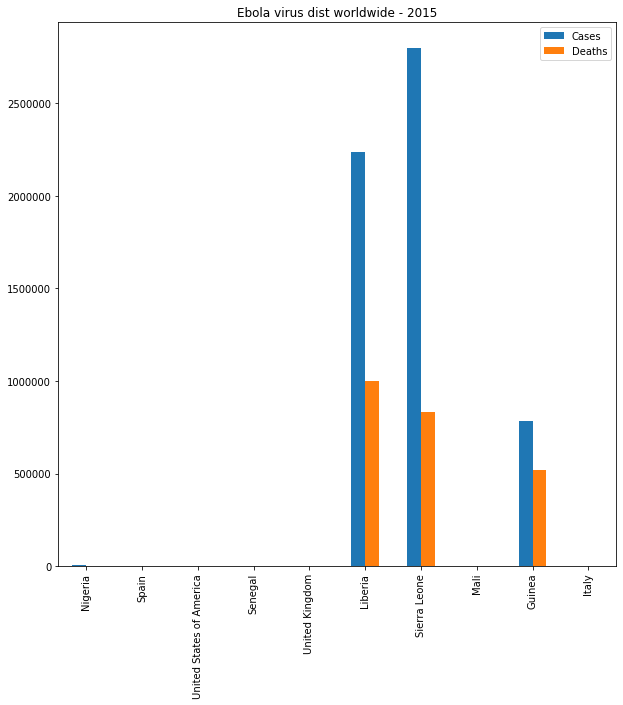

In [10]:
ebola2015_df.plot(kind='bar', figsize=(10, 10))
plt.title('Ebola virus dist worldwide - 2015')

Text(0.5, 1.0, 'Ebola virus dist worldwide - 2016')

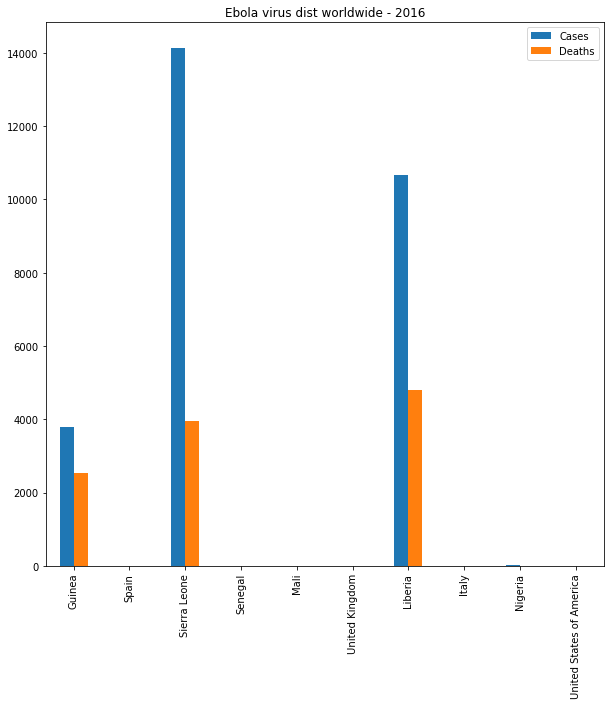

In [11]:
ebola2016_df.plot(kind='bar', figsize=(10, 10))
plt.title('Ebola virus dist worldwide - 2016')

In [12]:
# 2015, 2016년 데이터를 상 하반기로 나누기. ( 2014년 데이터는 하반기부터 시작됨. 2016년 데이터는 하반기가 없음. )
mask_2015_first = (ebola2015['Date'] >= '2015-01-01') & (ebola2015['Date'] <= '2015-06-30')
mask_2015_second = (ebola2015['Date'] >= '2015-07-01') & (ebola2015['Date'] <= '2015-12-31')

In [13]:
"""
데이터셋
    ebola2014
    ebola2015_first, ebola2015_second
    ebola2016
"""
ebola2015_first = ebola2015.loc[mask_2015_first]
ebola2015_second = ebola2015.loc[mask_2015_second]

In [14]:
ebola2014_cases = ebola2014.Cases.sum()
ebola2014_deaths = ebola2014.Deaths.sum()

ebola2015_first_cases = ebola2015_first.Cases.sum()
ebola2015_first_deaths = ebola2015_first.Deaths.sum()
ebola2015_second_cases = ebola2015_second.Cases.sum()
ebola2015_second_deaths = ebola2015_second.Deaths.sum()

ebola2016_cases = ebola2016.Cases.sum()
ebola2016_deaths = ebola2016.Deaths.sum()

In [15]:
ebola_dataset = pd.DataFrame(
    data= {
        'Cases': [ebola2014_cases, ebola2015_first_cases, ebola2015_second_cases, ebola2016_cases],
        'Deaths': [ebola2014_deaths, ebola2015_first_deaths, ebola2015_second_deaths, ebola2016_deaths]
    },

    index= ['2014', '2015_first', '2015_second', '2016'],
    columns= ['Cases', 'Deaths']
)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

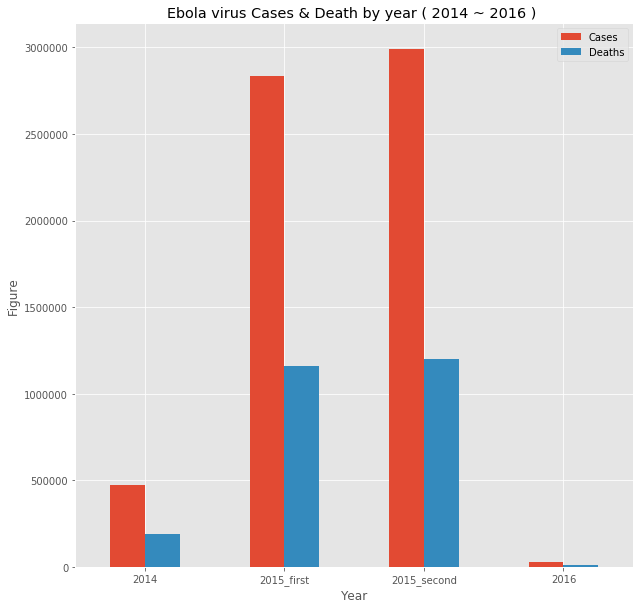

In [16]:
matplotlib.style.use('ggplot')
ebola_dataset.plot(kind='bar', figsize=(10, 10))
plt.title('Ebola virus Cases & Death by year ( 2014 ~ 2016 ) ')
plt.xlabel('Year')
plt.ylabel('Figure')
plt.xticks(rotation=0, horizontalalignment='center')

In [17]:
# 세계지도 정보 가져오기
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [18]:
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [19]:
# 데이터셋에서 각 나라의 Cases와 Deaths를 반환하는 함수
def retrn_groupData(dataset, country):
    return [dataset.loc[dataset['Country'] == country].Cases.sum(), dataset.loc[dataset['Country'] == country].Deaths.sum()]

In [20]:
"""
ebola2014 -> e2014
ebola2015 -> e2015
ebola2016 -> e2016
"""

e2014 = pd.DataFrame(
    data={
        'Country': ebola2014['Country'].unique(),
        'Cases': [retrn_groupData(ebola2014, x)[0] for x in ebola2014['Country'].unique()],
        'Deaths': [retrn_groupData(ebola2014, x)[1] for x in ebola2014['Country'].unique()]
    },
    columns=['Country', 'Cases', 'Deaths']
)

e2015 = pd.DataFrame(
    data={
        'Country': ebola2015['Country'].unique(),
        'Cases': [retrn_groupData(ebola2015, x)[0] for x in ebola2015['Country'].unique()],
        'Deaths': [retrn_groupData(ebola2015, x)[1] for x in ebola2015['Country'].unique()]
    },

    columns=['Country', 'Cases', 'Deaths']
)

e2016 = pd.DataFrame(
    data={
        'Country': ebola2016['Country'].unique(),
        'Cases': [retrn_groupData(ebola2016, x)[0] for x in ebola2016['Country'].unique()],
        'Deaths': [retrn_groupData(ebola2016, x)[1] for x in ebola2016['Country'].unique()]
    },

    columns=['Country', 'Cases', 'Deaths']
)


In [21]:
# Cases와 Deaths를 int, float으로 변환
def setInt(x):
    if x.name != 'Country':
        x = x.astype(int)

e2014.apply(setInt)
e2015.apply(setInt)
e2016.apply(setInt)

Country    None
Cases      None
Deaths     None
dtype: object

In [22]:
"""
def set_lower_data2014(x):
    if x >= 1000:
        return x * 1/100
    else:
        return x

def set_lower_data2015(x):
    if x >= 10000:
        return x * 1/100
    else:
        return x

def set_lower_data2016(x):
    if x >= 1000:
        return x * 1/10
    else:
        return x

e2014['Cases'] = e2014['Cases'].apply(set_lower_data2014)
e2014['Deaths'] = e2014['Deaths'].apply(set_lower_data2014)
e2015['Cases'] = e2015['Cases'].apply(set_lower_data2015)
e2015['Deaths'] = e2015['Deaths'].apply(set_lower_data2015)
e2016['Cases'] = e2016['Cases'].apply(set_lower_data2016)
e2016['Deaths'] = e2016['Deaths'].apply(set_lower_data2016)
"""

"\ndef set_lower_data2014(x):\n    if x >= 1000:\n        return x * 1/100\n    else:\n        return x\n\ndef set_lower_data2015(x):\n    if x >= 10000:\n        return x * 1/100\n    else:\n        return x\n\ndef set_lower_data2016(x):\n    if x >= 1000:\n        return x * 1/10\n    else:\n        return x\n\ne2014['Cases'] = e2014['Cases'].apply(set_lower_data2014)\ne2014['Deaths'] = e2014['Deaths'].apply(set_lower_data2014)\ne2015['Cases'] = e2015['Cases'].apply(set_lower_data2015)\ne2015['Deaths'] = e2015['Deaths'].apply(set_lower_data2015)\ne2016['Cases'] = e2016['Cases'].apply(set_lower_data2016)\ne2016['Deaths'] = e2016['Deaths'].apply(set_lower_data2016)\n"

In [23]:
# Country와 Geometry column만 남기고 모두 drop.
countries = countries.drop(['pop_est', 'continent', 'iso_a3', 'gdp_md_est'], axis=1)

In [24]:
def set_countries(dataset):

    countries['Cases'] = 0
    countries['Deaths'] = 0

    for i in range(countries.shape[0]):
        if countries.loc[i, 'name'] in list(dataset['Country']):
            country = countries['name'].loc[i]
            cases = dataset['Cases'].loc[dataset['Country'] == country].to_numpy()[0]
            deaths = dataset['Deaths'].loc[dataset['Country'] == country].to_numpy()[0]

            countries.loc[i, 'Cases'] = cases
            countries.loc[i, 'Deaths'] = deaths
    
    return countries

In [25]:
countries2014 = set_countries(e2014)
countries2015 = set_countries(e2015)
countries2016 = set_countries(e2016)

Text(0.5, 1, 'Evola virus cases dist worldwide (Deaths)')

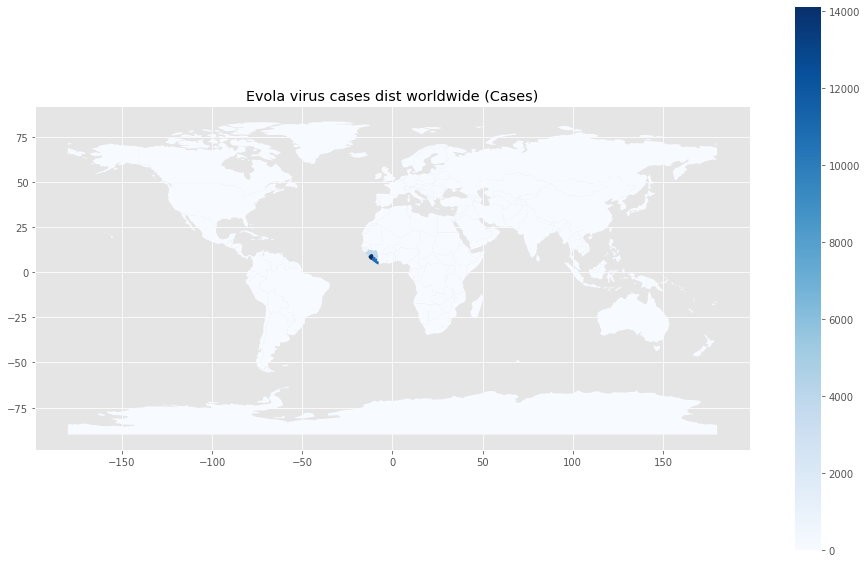

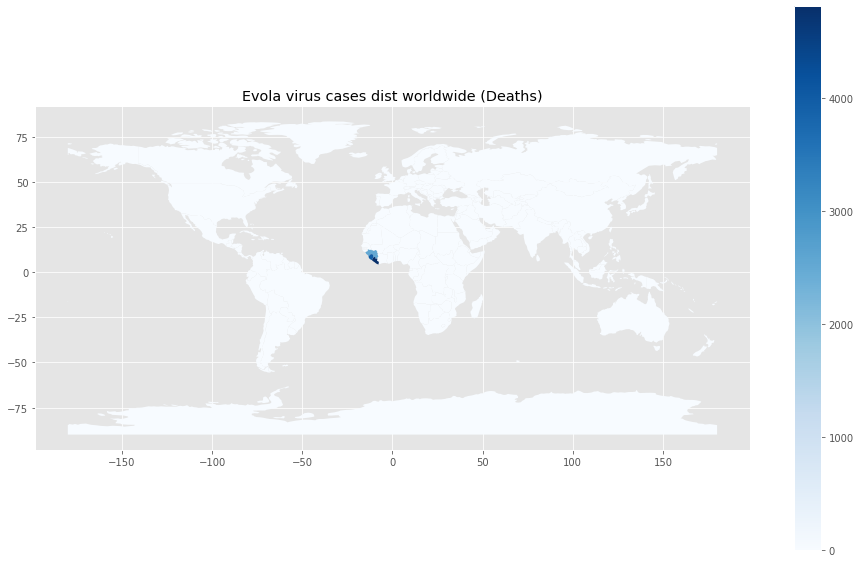

In [26]:
countries2014.plot(column='Cases', figsize=(16, 10), cmap='Blues', legend=True)
plt.title('Evola virus cases dist worldwide (Cases)')
countries2014.plot(column='Deaths', figsize=(16, 10), cmap='Blues', legend=True)
plt.title('Evola virus cases dist worldwide (Deaths)')

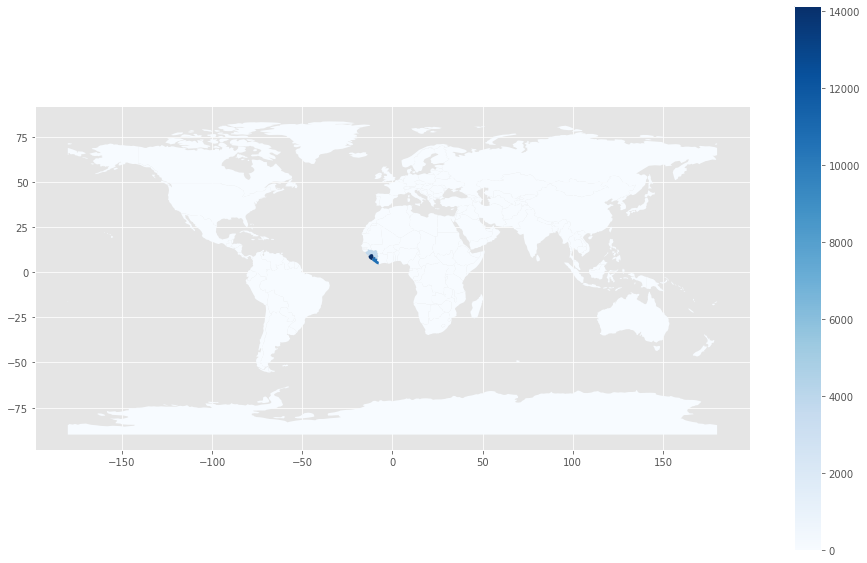

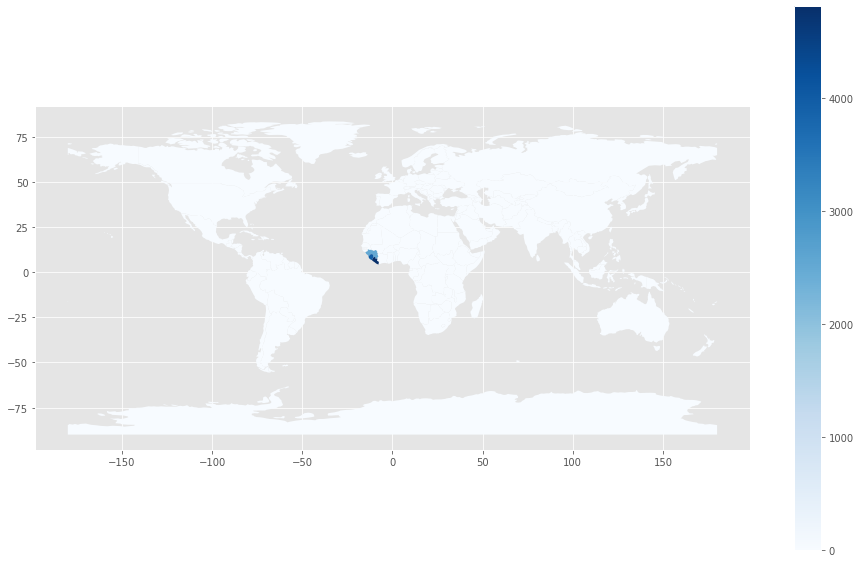

In [30]:
countries2015.plot(column='Cases', figsize=(16, 10), cmap='Blues', legend=True)
countries2015.plot(column='Deaths', figsize=(16, 10), cmap='Blues', legend=True)

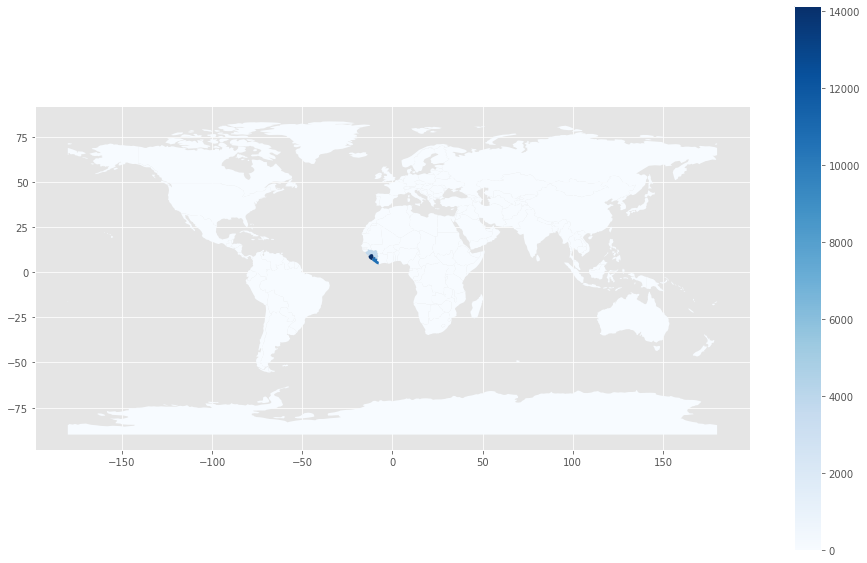

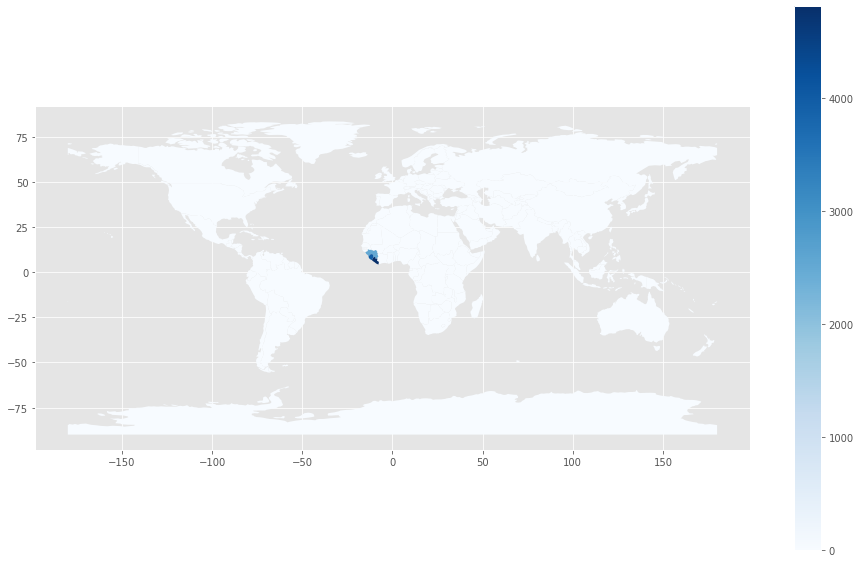

In [29]:
countries2016.plot(column='Cases', figsize=(16, 10), cmap='Blues', legend=True)
countries2016.plot(column='Deaths', figsize=(16, 10), cmap='Blues', legend=True)